In [1]:
# importing prerequisite packages
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
# uploading our dataset from a local directory
df1 = pd.read_csv(r'../tochora/baba/Corona_NLP_train.csv', encoding='latin-1')
df2 = pd.read_csv(r'../tochora/baba/Corona_NLP_test.csv', encoding='latin-1')
df1.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [3]:
# shape of the dataset
df1.shape

(41157, 6)

the first dataset has 41157 rows and 6 columns.

In [4]:
# a brief overview of the content of the second dataset
df2.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [5]:
df2.shape
# the second dataset has 3798 rows and 6 columns

(3798, 6)

In [6]:
# combining both datasets
df = pd.concat((df1, df2), join='outer')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


here we have joined the two datasets into one dataset 

In [7]:
# the shape of the complete dataset
df.shape

(44955, 6)

now our dataset has 44955 rows and 6 columns

In [8]:
# checking null variables
df.isnull().sum()

UserName            0
ScreenName          0
Location         9424
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

all columns besides Location which has 9424 null values do not have null variables

In [9]:
# frequency of the sentiments
df.Sentiment.value_counts()

Positive              12369
Negative              10958
Neutral                8332
Extremely Positive     7223
Extremely Negative     6073
Name: Sentiment, dtype: int64

sentiment column has 4 variables where positive sentiment has the most entries of 12369 while extremely negative have the lowest of 6073 entries.

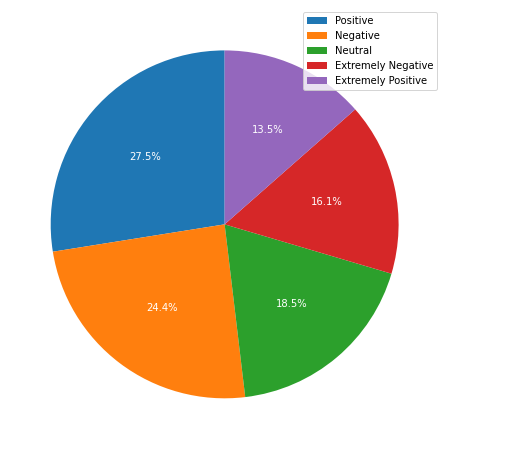

In [19]:
plt.figure(figsize=(8, 8))
plt.pie(df['Sentiment'].value_counts(), labels= ['Positive', 'Negative', 'Neutral', 'Extremely Negative', 'Extremely Positive'], startangle=90, autopct='%1.1f%%', textprops={'color' :'white'})
plt.legend(loc='best')
plt.show()

positive sentiments had the highest percentage of 27.5%, Negative = 24%, neutral= 18%  while extremely posive had the lowest percentage of 13.1%. Conclusion : This shows that most  tweets were positive followed by neutral upto extremely positive. positive tweets exceeded the negative tweets by 3%.

In [100]:
# columns in our dataset
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

finding the relationship between data and time.

In [21]:
# converting tweetat column from an object into a datetime
df['TweetAt'] = pd.to_datetime(df['TweetAt'], infer_datetime_format=True)
df['Date'] = df['TweetAt'].apply(lambda x : x.date())
reviews_per_day = df.groupby('Date').count()['OriginalTweet']
reviews_per_day = reviews_per_day.reset_index()
df['Month'] = reviews_per_day['Date'].apply(lambda x : x.month)
reviews_per_day.head()

,Date,OriginalTweet
0,2020-03-02,4
1,2020-03-03,4
2,2020-03-04,8
3,2020-03-05,6
4,2020-03-06,2


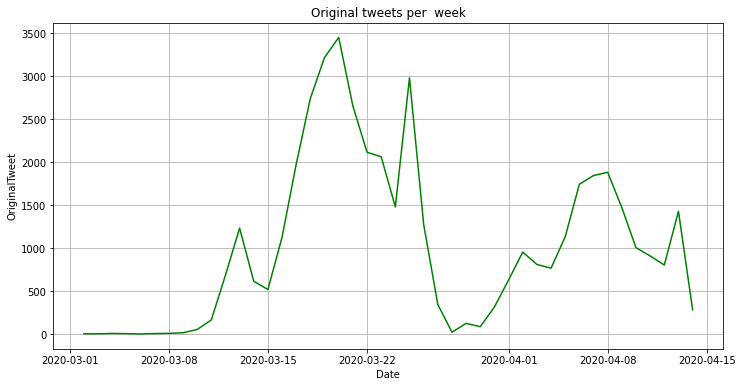

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='OriginalTweet', data=reviews_per_day, color='green')
plt.grid(True)
plt.title("Original tweets per  week")
plt.show()

tweets were quite constant at beggining of the period but peaked from date 15 upto approximately date 25.This shows that most people tweeted around date 15 to mid past date 22.

In [103]:
# slicing our dataset into two meaningful columns for analysis
df = df.loc[:, ['OriginalTweet', 'Sentiment']]
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


wordcloud is a grapphical representation of most frequent and relevant words in a text.The following are wordclouds are of the positive, negative,extremely positive and extremely negative sentiments.

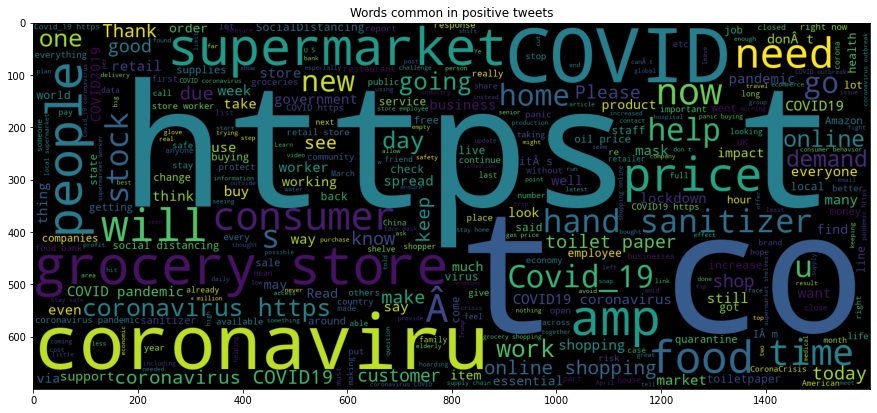

In [24]:
from wordcloud import WordCloud
plt.figure(figsize=(15, 10))
wc = WordCloud(max_words=3000, min_font_size=10, height=700, width=1600, colormap='viridis', background_color='black').generate(
    " ".join(df[df['Sentiment']=="Positive"].OriginalTweet)
)
plt.title('Words common in positive tweets')
plt.imshow(wc)

In [28]:
# a function to depict frequent words in particular sentiment
def frequent_words(text):
    word = pd.DataFrame(wc.process_text("".join(text)).items()).sort_values(1, ascending=False)
    print(f'top 6 frequent words in the text')

    for i in range(6):
        item = word.iloc[i]
        print(item[0] + "---> " + str(item[1]))



In [106]:
# common words in tweets considered positive
frequent_words(df[df['Sentiment']=='Positive'].OriginalTweet)

top 6 frequent words in the text
t co---> 7240
https t---> 7207
COVID---> 2194
coronavirus---> 2056
grocery store---> 1671
supermarket---> 1561


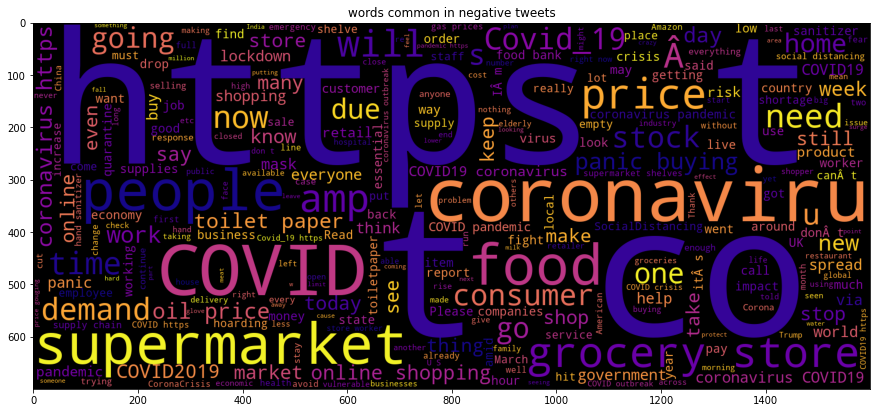

In [25]:
plt.figure(figsize=(15, 13))
wc = WordCloud(max_words=3000, min_font_size=10, height=700, width=1600, colormap='plasma', background_color='black').generate(
    " ".join(df[df['Sentiment']=="Negative"].OriginalTweet)
)
plt.title("words common in negative tweets")
plt.imshow(wc)

In [108]:
# most frequent words in negative tweets
frequent_words(df[df['Sentiment']=='Negative'].OriginalTweet)

top 6 frequent words in the text
t co---> 5902
https t---> 5876
coronavirus---> 2093
COVID---> 2084
supermarket---> 1476
food---> 1444


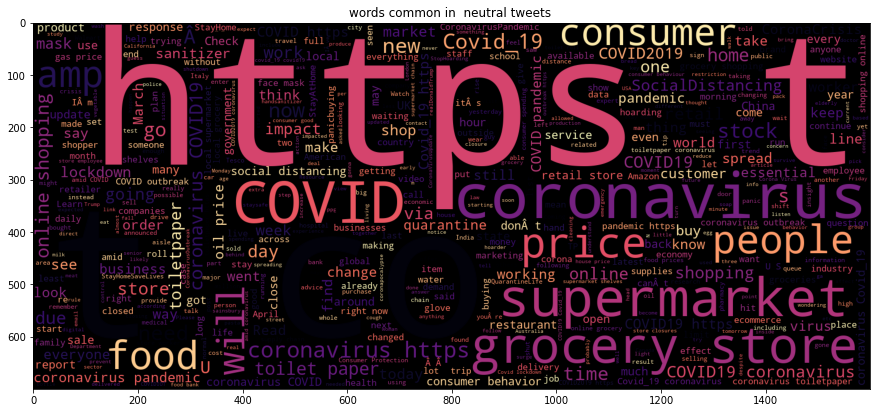

In [26]:
plt.figure(figsize=(15, 13))
wc = WordCloud(max_words=3000, min_font_size=10, height=700, width=1600, colormap='magma', background_color='black').generate(
    " ".join(df[df['Sentiment']=="Neutral"].OriginalTweet)
)
plt.title("words common in  neutral tweets ")
plt.imshow(wc)

In [29]:
# most frequent words in tweets considered neutral
frequent_words(df[df['Sentiment']=='Neutral'].OriginalTweet)

top 6 frequent words in the text
t co---> 5946
https t---> 5909
coronavirus---> 1611
COVID---> 1360
supermarket---> 1171
grocery store---> 1036


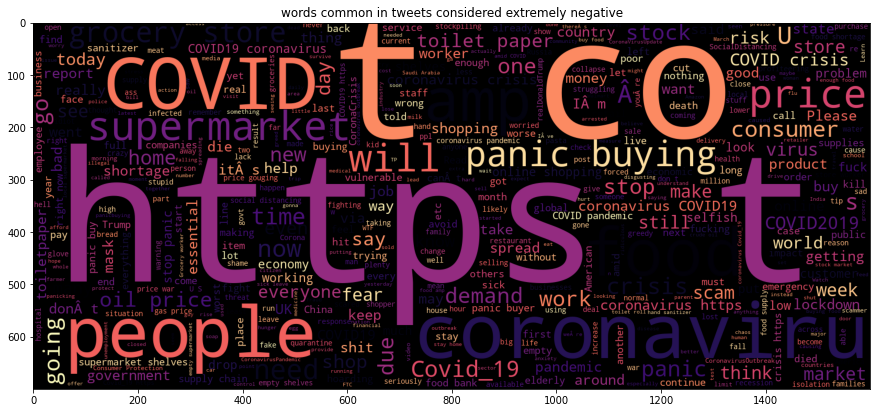

In [30]:

plt.figure(figsize=(15, 13))
wc = WordCloud(max_words=3000, min_font_size=10, height=700, width=1600, colormap='magma', background_color='black').generate(
    " ".join(df[df['Sentiment']=="Extremely Negative"].OriginalTweet)
)
plt.title("words common in tweets considered extremely negative")
plt.imshow(wc)

In [112]:
# top words in extremely negative tweets
frequent_words(df[df['Sentiment']=='Extremely Negative'].OriginalTweet)

top 6 frequent words in the text
t co---> 2748
https t---> 2735
coronaviru---> 1410
COVID---> 1305
people---> 1244
food---> 1122


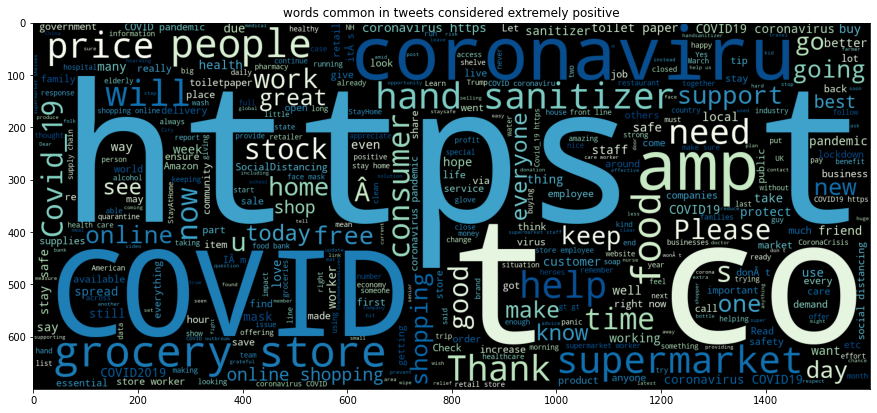

In [33]:
# a wordclud of extremely posive tweets
plt.figure(figsize=(15, 13))
wc = WordCloud(max_words=3000, min_font_size=10, height=700, width=1600, colormap='GnBu', background_color='black').generate(
    " ".join(df[df['Sentiment']=="Extremely Positive"].OriginalTweet)
)
plt.title("words common in tweets considered extremely positive")
plt.imshow(wc)

In [114]:
# frequent words in tweets with extremely positive sentiments
frequent_words(df[df['Sentiment']=='Extremely Positive'].OriginalTweet)

top 6 frequent words in the text
t co---> 3962
https t---> 3943
COVID---> 1538
coronavirus---> 1345
amp---> 1223
grocery store---> 1011


text cleaning

In [115]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
# a function to clean our text
def cleaning(text):
    clean_text = text.translate(str.maketrans(" ", " ", string.punctuation)).lower()
    #splitting words in the text into a list 
    clean_text = [w for w in clean_text.split() if w not in set(stopwords.words('english'))]
    # creating an empty list
    sentence = []
    for word in clean_text:
        # applying wordnetlemmatizer to modify words into their basic form
        lemmatizer = WordNetLemmatizer()
        # adding modified text into our empty list
        sentence.append(lemmatizer.lemmatize(word, 'v'))
        # restoring words in the text into the original format
    return " ".join(sentence)

In [116]:
# a sample of the cleaned text
df['OriginalTweet'].apply(cleaning)

0       menyrbie philgahan chrisitv httpstcoifz9fan2pa...
1       advice talk neighbour family exchange phone nu...
2       coronavirus australia woolworths give elderly ...
3       food stock one empty please dont panic enough ...
4       ready go supermarket covid19 outbreak im paran...
                              ...                        
3793    meanwhile supermarket israel people dance sing...
3794    panic buy lot nonperishable items echo need fo...
3795    asst prof economics cconces nbcphiladelphia ta...
3796    gov need somethings instead biar je rakyat ass...
3797    forestandpaper members commit safety employees...
Name: OriginalTweet, Length: 44955, dtype: object

model building with lstm.
LSTM means long short term memory which is a type of recurrent  neural network which is capable of learning about a sequence, recognize a pattern and make a prediction.

In [120]:
# importing prerequisite packages
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
#splitting our data into train and testing inputs
x_train, x_test, y_train, y_test = train_test_split(df['OriginalTweet'], df['Sentiment'], test_size=0.2)
# splitting paragraphs and long sentences into small units that can be assigned meaning
#maximum words are 5000
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
# craeting a new vocabulary index based on word frequency
tokenizer.fit_on_texts(x_train)
total_word = len(tokenizer.word_index)
#converting words into a sequence
train_seq = tokenizer.texts_to_sequences(x_train)
train_padded = pad_sequences(train_seq)
test_seq = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_seq)
#using labelbinarizer to encode categorical data in our text into numpy arrays

lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train)
test_labels = lb.transform(y_test)



In [122]:
#modelling 
model_lstm = Sequential([tf.keras.layers.Embedding(total_word, 8),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(16, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(5, activation='softmax')])
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 8)           615392    
                                                                 
 bidirectional_4 (Bidirectio  (None, 32)               3200      
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 5)                 85        
                                                      

In [123]:
# 
model_lstm.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.fit(train_padded, train_labels, epochs=7, validation_data=(test_padded, test_labels))

Epoch 1/7
1124/1124 [==============================] - 133s 109ms/step - loss: 1.5152 - accuracy: 0.2941 - val_loss: 1.3722 - val_accuracy: 0.3986
Epoch 2/7
1124/1124 [==============================] - 105s 93ms/step - loss: 1.3226 - accuracy: 0.4240 - val_loss: 1.1340 - val_accuracy: 0.5672
Epoch 3/7
1124/1124 [==============================] - 109s 97ms/step - loss: 1.0709 - accuracy: 0.5693 - val_loss: 0.9295 - val_accuracy: 0.6684
Epoch 4/7
1124/1124 [==============================] - 106s 94ms/step - loss: 0.9373 - accuracy: 0.6453 - val_loss: 0.8612 - val_accuracy: 0.7055
Epoch 5/7
1124/1124 [==============================] - 100s 89ms/step - loss: 0.8829 - accuracy: 0.6718 - val_loss: 0.8460 - val_accuracy: 0.7138
Epoch 6/7
1124/1124 [==============================] - 122s 109ms/step - loss: 0.8504 - accuracy: 0.6935 - val_loss: 0.8241 - val_accuracy: 0.7127
Epoch 7/7
1124/1124 [==============================] - 109s 97ms/step - loss: 0.8230 - accuracy: 0.7079 - val_loss: 0.8154

<AxesSubplot:>

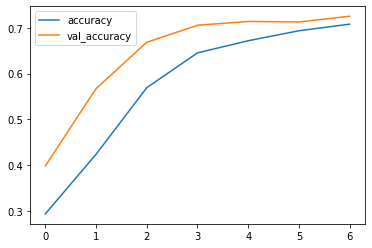

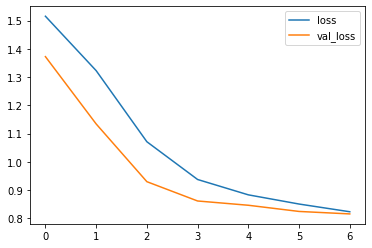

In [124]:
#a plot of the model performace
modell = pd.DataFrame(model_lstm.history.history)
modell[["accuracy", 'val_accuracy']].plot()
modell[['loss', "val_loss"]].plot()

based on the above graphs our model performed better with an accuarcy of 70% thus we will use it to predict some texts.

In [125]:
# a function that will be used to predict our text
def make_prediction(text):
    #cleaning our text
    text = cleaning(text)
    # converting of sentences in our text into meaningful units and convert them into a sequence of words
    textseq = tokenizer.texts_to_sequences([text])
    textpadded = pad_sequences(textseq)
    # using our model to predict our text
    predict = model_lstm.predict(textpadded)
    # converting the predicted nummy array into a word as trained by the model
    result = lb.inverse_transform(predict)
    return result



In [126]:
# predicting our text
text = "there was a bug in this app.I really dislike this"
make_prediction(text)

1/1 [==============================] - 2s 2s/step


array(['Negative'], dtype='<U18')

well our model preformed well thus let us check whether it will predict a postive sentiment accurately.

In [127]:
# a postive reply
text = "I really love this app.good visuals"
make_prediction(text)

1/1 [==============================] - 0s 45ms/step


array(['Extremely Positive'], dtype='<U18')